<a href="https://colab.research.google.com/github/niikun/Data-Structure-and-Algorithm/blob/main/dynamic_program%EF%BD%8Ding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Programming DP

動的計画法（Dynamic Programming, DP）は、複雑な問題を解くためのアルゴリズムの一つで、大きな問題を小さな部分問題に分割し、それらを解いて最終的な解を得る方法です。DPは主に以下の2つの特性を持つ問題に適用されます：

1. 部分問題の最適性（Optimal Substructure）：大きな問題の解が、その部分問題の解から構成できる。  
2. 重複部分問題（Overlapping Subproblems）：同じ部分問題が何度も現れる。

## 動的計画法の基本的なステップ
1. 問題を部分問題に分割する：解決しようとしている問題を、もっと小さな部分問題に分ける。
2. 部分問題を解く：小さな部分問題の解を見つける。
3. 部分問題の解を組み合わせる：部分問題の解を使って、元の問題の解を得る。

### 例：フィボナッチ数列
フィボナッチ数列を求める問題を動的計画法で解く例を見てみましょう。フィボナッチ数列は、次のように定義されます：  
- $𝐹(0)=0$  
- $𝐹(1)=1$  
- $𝐹(𝑛)=𝐹(𝑛−1)+𝐹(𝑛−2)$  

この問題は、部分問題の最適性と重複部分問題の両方の特性を持っています。

#### 再帰的な解法  
まず、再帰的に解く方法を考えてみましょう：  
この方法はシンプルですが、部分問題が何度も再計算されるため、非常に非効率です。

In [ ]:
def fib(n):
    if n<=1:
        return n
    else:
        return fib(n-1)+fib(n-2)

In [ ]:
for i in range(10):
    print(f"n: {i} fib: {fib(i)}")

n: 0 fib: 0 
n: 1 fib: 1 
n: 2 fib: 1 
n: 3 fib: 2 
n: 4 fib: 3 
n: 5 fib: 5 
n: 6 fib: 8 
n: 7 fib: 13 
n: 8 fib: 21 
n: 9 fib: 34 


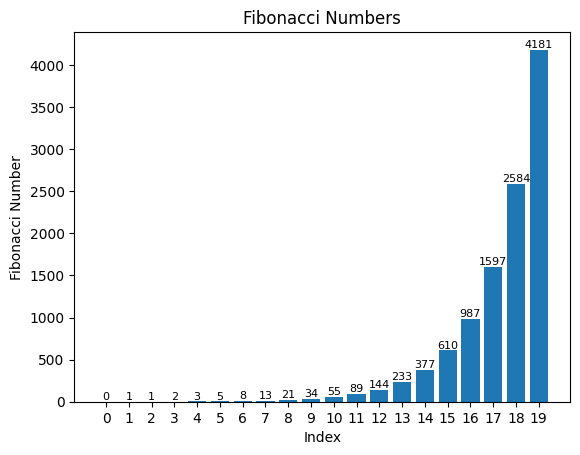

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fib_list = [fib(i) for i in range(20)]
plt.bar(x=np.arange(20),height=fib_list)
plt.xticks(np.arange(20))
for i in range(20):
    plt.text(i, fib_list[i], str(fib_list[i]), ha='center', va='bottom',fontsize=8)
plt.xlabel('Index')
plt.ylabel('Fibonacci Number')
plt.title('Fibonacci Numbers')
plt.show()

#### 動的計画法による解法
動的計画法を用いることで、効率的に解決できます。メモリに既に計算した部分問題の結果を保存し、再利用します。

##### 動的計画法の利点
1. 効率性：部分問題を一度だけ解くため、計算量が大幅に削減される。  
2. 再利用性：メモリを使って計算結果を保存するため、同じ部分問題を何度も解く必要がない。

In [ ]:
def fib_dp(n):
    if n <= 1:
        return n
    dp = [0] * (n+1)
    dp[0] = 0
    dp[1] = 1
    for i in range(2, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    print(dp)
    return dp[n]

#### 比較
**再帰的手法の場合**

In [ ]:
%%time
fib(20)

CPU times: user 2.8 ms, sys: 0 ns, total: 2.8 ms
Wall time: 2.8 ms


6765

**動的計画法の場合**

In [ ]:
%%time
fib_dp(20)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
CPU times: user 902 µs, sys: 0 ns, total: 902 µs
Wall time: 909 µs


6765

### 例：コインの最小枚数問題  
コインの最小枚数問題（Minimum Coin Change Problem）は、与えられた金額を最小枚数のコインで支払う方法を求める問題です。例えば、利用できるコインの種類が [1円, 5円, 10円] のとき、金額をちょうど支払うために必要な最小枚数のコインを求めます。

#### 問題の定義
入力：コインの種類のリスト（例えば [1, 5, 10]）と、支払いたい金額（例えば 16円）。
出力：金額をちょうど支払うために必要なコインの最小枚数。

coins = [1, 5, 10]の場合は正しい

In [ ]:
coins = [1, 5, 10]
amount = 16

##### GreedyAlgrithmの場合

In [ ]:
def coin_change(coins, amount):
    change_dict={}
    coins.sort(reverse=True)
    for coin in coins:
        change_dict[coin]= amount//coin
        amount = amount % coin
    return change_dict

In [ ]:
coin_change(coins, amount)

{10: 1, 5: 1, 1: 1}

coins = [1, 3, 4] の場合は間違える  
正解は{4: 0, 3: 2, 1: 0}

In [ ]:
coins = [1, 3, 4]
amount = 6

In [ ]:
coin_change(coins, amount)

{4: 1, 3: 0, 1: 2}

#### Dynamic Programmingの場合
1. 部分問題の定義: 金額$i$を支払うために必要な最小枚数のコイン数を$dp[i]$とする  
2. 初期条件: $dp[0]=0$（０円を支払うためのコインの枚数は０枚）
3. 状態遷移: $dp[i]=min(dp[i-c]+1)$ここで$c$は利用できるコインの種類

In [ ]:
def coin_change_dp(coins,amount):
    dp = [float("inf")] * (amount + 1)
    dp[0] = 0
    for i in range(1,amount + 1):
        for coin in coins:
            if i- coin >=0:
                dp[i] = min(dp[i],dp[i-coin]+1)

    return dp[amount] if dp[amount] != float("inf") else -1

In [ ]:
coins = [1, 5, 10]
amount = 16

In [ ]:
coin_change_dp(coins, amount)

3

In [ ]:
coins = [1, 3, 4]
amount = 6

In [ ]:
coin_change_dp(coins, amount)

2

## Change Money

### Greedy approach

In [ ]:
coins = [6,5,1]
amount = 9

In [ ]:
def change_greedy(coins,amount):
    change_dict={}
    for coin in coins:
        num = amount // coin
        amount = amount % coin
        change_dict[coin] = num

    return change_dict

In [ ]:
%%time
change_greedy(coins,amount)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.9 µs


{6: 1, 5: 0, 1: 3}

In [ ]:
%%time
coins = [1, 3, 4]
amount = 6

change_greedy(coins,amount)

CPU times: user 33 µs, sys: 3 µs, total: 36 µs
Wall time: 40.3 µs


{1: 6, 3: 0, 4: 0}

### Recursive Change  
$  MinNumCoins(9) = min(  $  
        $MinNumCoins(9-6)+1, $  
        $MinNumCoins(9-5)+1,$    
        $MinNumCoins(9-1)+1$  
$)$


In [ ]:
def change_recursive(coins,amount):
    if amount == 0:
        return 0
    min_coins = float("inf")
    for coin in coins:
        if amount - coin >= 0:
            current_min_coins = change_recursive(coins, amount - coin)
            if current_min_coins != float('inf'):
                min_coins = min(min_coins, current_min_coins + 1)

    return min_coins if min_coins != float("inf") else -1

In [ ]:
%%time
coins = [6,5,1]
amount = 9

change_recursive(coins,amount)

CPU times: user 87 µs, sys: 0 ns, total: 87 µs
Wall time: 91.6 µs


4

In [ ]:
%%time
coins = [1, 3, 4]
amount = 6

change_recursive(coins,amount)

CPU times: user 70 µs, sys: 0 ns, total: 70 µs
Wall time: 73.9 µs


2

### Dynamic Programming



In [ ]:
def change_dp(coins,amount):
    dp = [float("inf")] * (amount + 1)
    dp[0] = 0
    for i in range(1,amount +1):
        for coin in coins:
            if i >=coin:
                dp[i] = min(dp[i],dp[i-coin]+1)

    return dp[amount] if dp[amount] != float("inf") else -1

In [ ]:
%%time
coins = [6,5,1]
amount = 9

change_dp(coins,amount)

CPU times: user 46 µs, sys: 4 µs, total: 50 µs
Wall time: 55.1 µs


4

In [ ]:
%%time
coins = [1, 3, 4]
amount = 6

change_dp(coins,amount)

CPU times: user 47 µs, sys: 0 ns, total: 47 µs
Wall time: 50.5 µs


2

In [ ]:
coins = [1,8,20]
amount = 24

In [ ]:
coins.sort(reverse=True)
num = 0
for coin in coins:
    num += amount // coin
    amount = amount % coin
num

5

In [ ]:
amount=997
coins=[2,4,8]

In [ ]:
dp= [float("inf")] * (amount + 1)
dp[0] = 0
for i in range(1,amount+1):
    for coin in coins:
        if i >= coin:
            dp[i] = min(dp[i],1+dp[i-coin])
if dp[amount]!= float("inf"):
    print(dp[amount])
else:
    print(-1)


-1


In [ ]:
import numpy as np
def fast_rock(n,m):
    matrix = np.ones((n+1,m+1))
    for i in range(n+1):
        for j in range(m+1):
            if (i%2==0 or i ==0) and (j%2==0 or j ==0):
                matrix[i][j]=0
    return matrix

## Editting Distance


例：編集距離を求める
文字列𝐴="𝑘𝑖𝑡𝑡𝑒𝑛"と𝐵="𝑠𝑖𝑡𝑡𝑖𝑛𝑔"の編集距離を求めます。

#####ステップ 1: 初期化  
まず、以下のようにテーブル𝑑𝑝を作成します。このテーブルのサイズは
(𝑚+1)×(𝑛+1)です。  
ここで、𝑚 は文字列𝐴 の長さ、𝑛 は文字列𝐵
の長さです。
𝑑𝑝[𝑖][𝑗]は、文字列
𝐴の最初の𝑖 文字と文字列𝐵の最初の𝑗 文字の間の編集距離を示します。  
初期化のために、𝑑𝑝 の各セルを次のように設定します：  

𝑑𝑝[0][0]=0（どちらも空文字列の編集距離は 0）  
𝑑𝑝[𝑖][0]=𝑖（𝐴の最初の𝑖 文字を空文字にするためには𝑖 回削除が必要）  
𝑑𝑝[0][𝑗]=𝑗
（空文字列を𝐵の最初の𝑗 文字にするためには𝑗 回挿入が必要）  
この初期化後のテーブルは以下のようになります：
```
   ''  s  i  t  t  i  n  g
''  0  1  2  3  4  5  6  7
k   1
i   2
t   3
t   4
e   5
n   6
```


ステップ 2: テーブルの埋め込み
次に、テーブル 𝑑𝑝 の各セルを埋めていきます。各セル 𝑑𝑝[𝑖][𝑗]は以下のように計算されます：  

𝑑𝑝[𝑖][𝑗]=min⁡
(𝑑𝑝[𝑖−1][𝑗]+1,𝑑𝑝[𝑖][𝑗−1]+1,𝑑𝑝[𝑖−1][𝑗−1]+𝑐𝑜𝑠𝑡)  

ここで、𝑐𝑜𝑠𝑡は𝐴[𝑖−1]=𝐵[𝑗−1]の場合は 0、それ以外の場合は 1 です。  
計算例  
𝑑𝑝[1][1] の計算:  
比較:  
𝐴[0]=′𝑘′ と𝐵[0]=′𝑠′  

置換コスト:   
𝑐𝑜𝑠𝑡=1（'k' を 's' に置換）  
候補:  
削除:   
𝑑𝑝[0][1]+1=1+1=2  
挿入:   
𝑑𝑝[1][0]+1=1+1=2  
置換:   
𝑑𝑝[0][0]+𝑐𝑜𝑠𝑡=0+1=1  
最小値を取る:   
𝑑𝑝[1][1]=1  
```
   ''  s  i  t  t  i  n  g
''  0  1  2  3  4  5  6  7
k   1  1
i   2
t   3
t   4
e   5
n   6
```

𝑑𝑝[1][2] の計算:  
比較:   
𝐴[0]=′𝑘′ と𝐵[1]=′𝑖′  
置換コスト:   
𝑐𝑜𝑠𝑡=1  
候補:  
削除: 𝑑𝑝[0][2]+1=2+1=3  
挿入: 𝑑𝑝[1][1]+1=1+1=2  
置換: 𝑑𝑝[0][1]+𝑐𝑜𝑠𝑡=1+1=2
最小値を取る:  
𝑑𝑝[1][2]=2
```
   ''  s  i  t  t  i  n  g
''  0  1  2  3  4  5  6  7
k   1  1  2
i   2
t   3
t   4
e   5
n   6

```
以上、最後まで計算する。
```
   ''  s  i  t  t  i  n  g
''  0  1  2  3  4  5  6  7
k   1  1  2  3  4  5  6  7
i   2  2  1  2  3  4  5  6
t   3  3  2  1  2  3  4  5
t   4  4  3  2  1  2  3  4
e   5  5  4  3  2  2  3  4
n   6  6  5  4  3  3  2  3

```
##### 最終結果
最終的な編集距離は𝑑𝑝[6][7]=3です。  
つまり、「kitten」を「sitting」に変換するために必要な操作は3回です。

この操作には以下が含まれます：

1. 'k' を 's' に置換
2. 'e' を 'i' に置換
3. 最後に 'g' を追加

In [18]:
str1 = "kitten"
str2 = "sitting"

In [20]:
def editing_distance(a, b):
    m = len(a)
    n = len(b)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j  # 第一行の初期化
            elif j == 0:
                dp[i][j] = i  # 第一列の初期化
            else:
                if a[i - 1] == b[j - 1]:
                    cost = 0
                else:
                    cost = 1

                dp[i][j] = min(dp[i - 1][j] + 1,     # 削除
                               dp[i][j - 1] + 1,     # 挿入
                               dp[i - 1][j - 1] + cost)  # 置換

    return dp[m][n]

In [21]:
editing_distance(str1,str2)

3

In [22]:
!pip install Levenshtein

In [23]:
import Levenshtein
print(Levenshtein.distance(str1,str2))

3


In [24]:
str3 = "editting"
str4 = "distance"

In [25]:
editing_distance(str3,str4)

5

In [28]:
Levenshtein.distance(str3,str4)

5